### Analyzing Stack Overflow Survery Data - Practicing Data Cleaning and Handling Missing Data

Importing data analysis and data visualization libraries as well as the iterative imputer for multiple imputation.

In [42]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

Read in data and print column names

In [4]:
df = pd.read_csv('developer_dataset.csv', low_memory=False)
 
print(df.columns)

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn'],
      dtype='object')


In [19]:
# df.dtypes

Check number of non-null value observations per row to see which are missing more than others

In [24]:
print(len(df.index))
df.count()

111209


RespondentID              111209
Year                      111209
Country                   111209
Employment                109425
UndergradMajor             98453
DevType                   100433
LanguageWorkedWith        102018
LanguageDesireNextYear     96044
DatabaseWorkedWith         85859
DatabaseDesireNextYear     74234
PlatformWorkedWith         91609
PlatformDesireNextYear     85376
Hobbyist                   68352
OrgSize                    54804
YearsCodePro               94793
JobSeek                    60556
ConvertedComp              91333
WorkWeekHrs                51089
NEWJobHunt                 19127
NEWJobHuntResearch         18683
NEWLearn                   24226
dtype: int64

Run some summary statistics of int and float dtype columns

In [17]:
df.describe()

,RespondentID,Year,YearsCodePro,ConvertedComp,WorkWeekHrs
count,111209.000000,111209.000000,94793.000000,9.133300e+04,51089.000000
mean,19262.039709,2018.854832,9.547045,1.251777e+05,41.051670
std,11767.011322,0.777503,7.548931,2.461218e+05,13.833929
min,1.000000,2018.000000,0.000000,0.000000e+00,1.000000
25%,9268.000000,2018.000000,4.000000,4.600000e+04,40.000000
50%,18535.000000,2019.000000,8.000000,7.900000e+04,40.000000
75%,28347.000000,2019.000000,14.000000,1.200000e+05,42.000000
max,42857.000000,2020.000000,50.000000,2.000000e+06,475.000000


Determine percentage missing data for each column for potential deletion

In [18]:
maxRows = df['RespondentID'].count()
 
print('% Missing Data:')
print((1 - df.count() / maxRows) * 100)

% Missing Data:
RespondentID               0.000000
Year                       0.000000
Country                    0.000000
Employment                 1.604187
UndergradMajor            11.470295
DevType                    9.689863
LanguageWorkedWith         8.264619
LanguageDesireNextYear    13.636486
DatabaseWorkedWith        22.794918
DatabaseDesireNextYear    33.248208
PlatformWorkedWith        17.624473
PlatformDesireNextYear    23.229235
Hobbyist                  38.537349
OrgSize                   50.719816
YearsCodePro              14.761395
JobSeek                   45.547573
ConvertedComp             17.872654
WorkWeekHrs               54.060373
NEWJobHunt                82.800852
NEWJobHuntResearch        83.200101
NEWLearn                  78.215792
dtype: float64


Safe to remove variables with ~60% or more missing data.

In [25]:
df.drop(['NEWJobHunt','NEWJobHuntResearch','NEWLearn'],
    axis=1,
    inplace=True)

I want to look at employment and developer type columns per country. There is missing data in these columns. The below code looks at volume of missing devtype and employment data points per country.

          Country  Employment  DevType
0          Canada         148      944
1           China         139      491
2          France         104      848
3         Germany         386     1691
4           Japan          13      109
5          Mexico          25      207
6           Spain          74      434
7  United Kingdom         196     1472
8   United States         699     4580


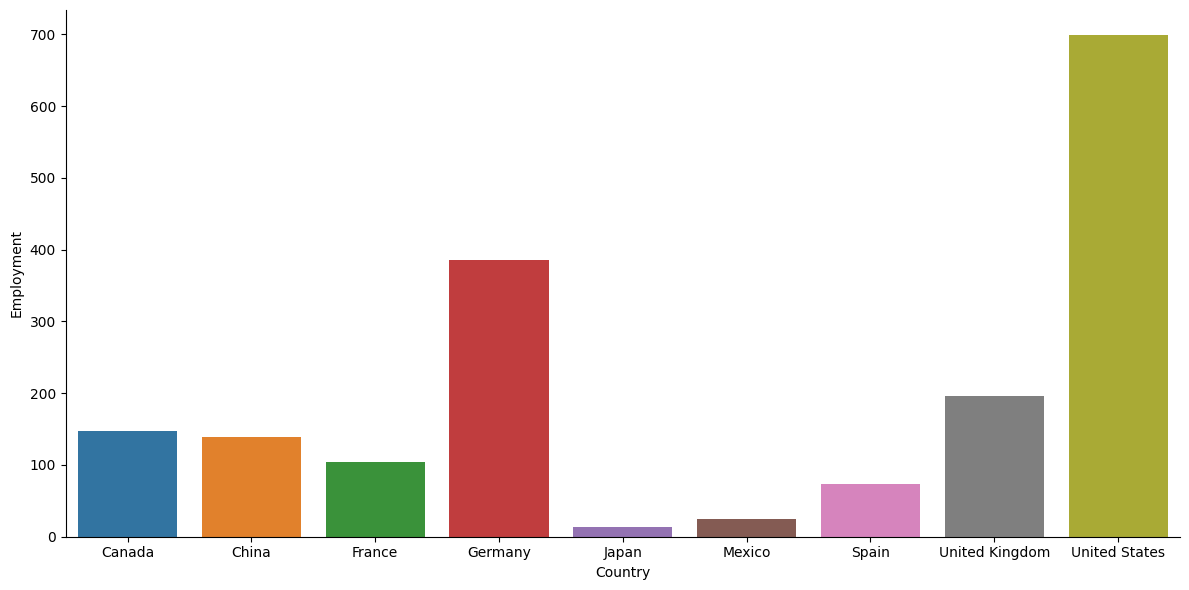

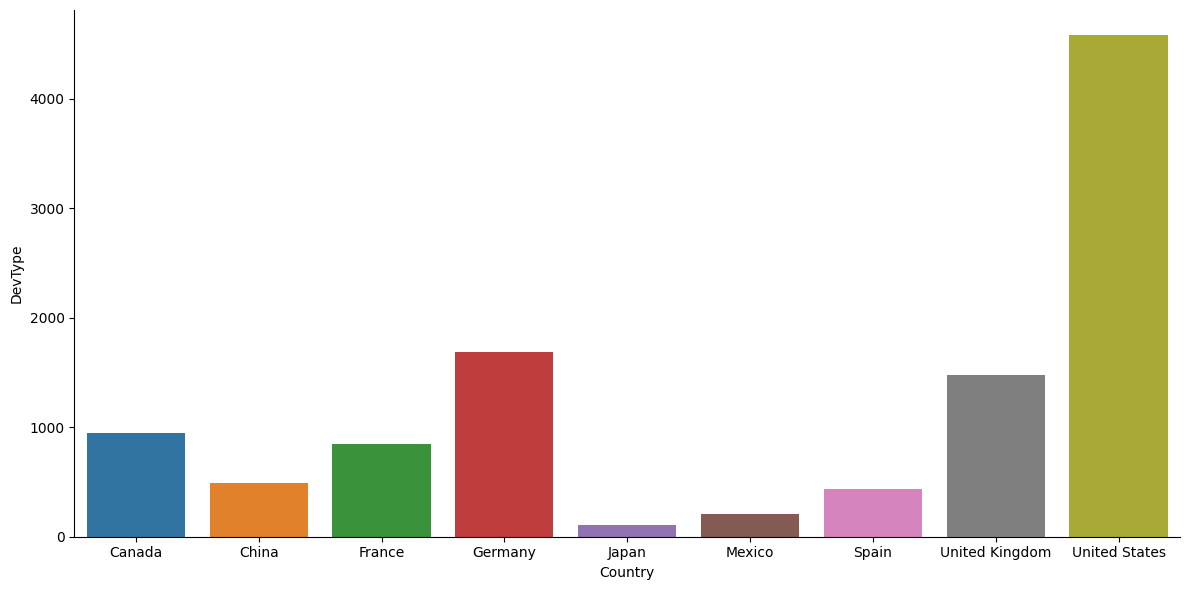

In [28]:
df[['RespondentID','Country']].groupby('Country').count()
 
missingData = df[['Employment','DevType']].isnull().groupby(df['Country']).sum().reset_index()
print(missingData)
 
A=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="Employment",
    height = 6, aspect = 2)
B=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="DevType",
    height = 6, aspect = 2)

The data is missing in proportions that are relative to the countries' populations. With this in mind, the missing data is missing completely at random (MCAR) and can be removed. The code below employs pairwise deletion to remove complete rows that have missing data in either Employment or DevType columns.

In [29]:
df.dropna(subset = ['Employment','DevType'],
    inplace = True,
    how = 'any')

Next, I want to aggregate data by key developer types: Front-end, Back-end, Full-stack, Mobile development, Administration roles. The code below plots the distribution of these developer types by country. There is also a figure plotting employment type ditribution by country.

/var/folders/nq/d5k2n21s4yxgqbs_k02b1p2h0000gp/T/ipykernel_44791/309494440.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
/var/folders/nq/d5k2n21s4yxgqbs_k02b1p2h0000gp/T/ipykernel_44791/309494440.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
/var/folders/nq/d5k2n21s4yxgqbs_k02b1p2h0000gp/T/ipykernel_44791/309494440.py:10: SettingWithCopyWarning: 
A value

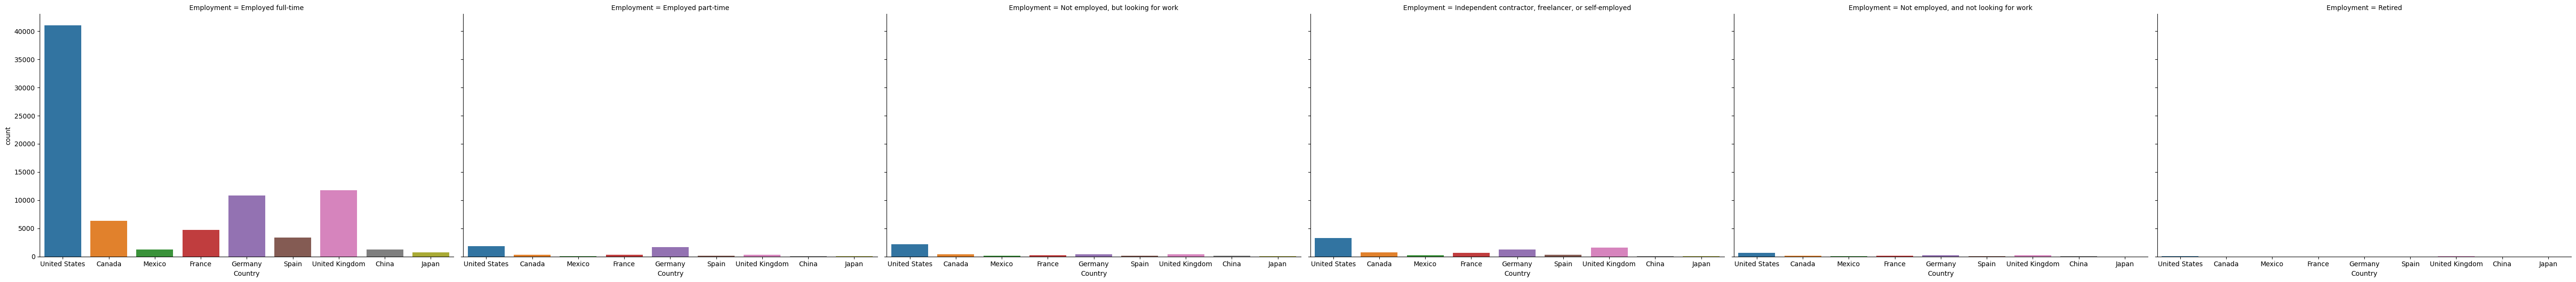

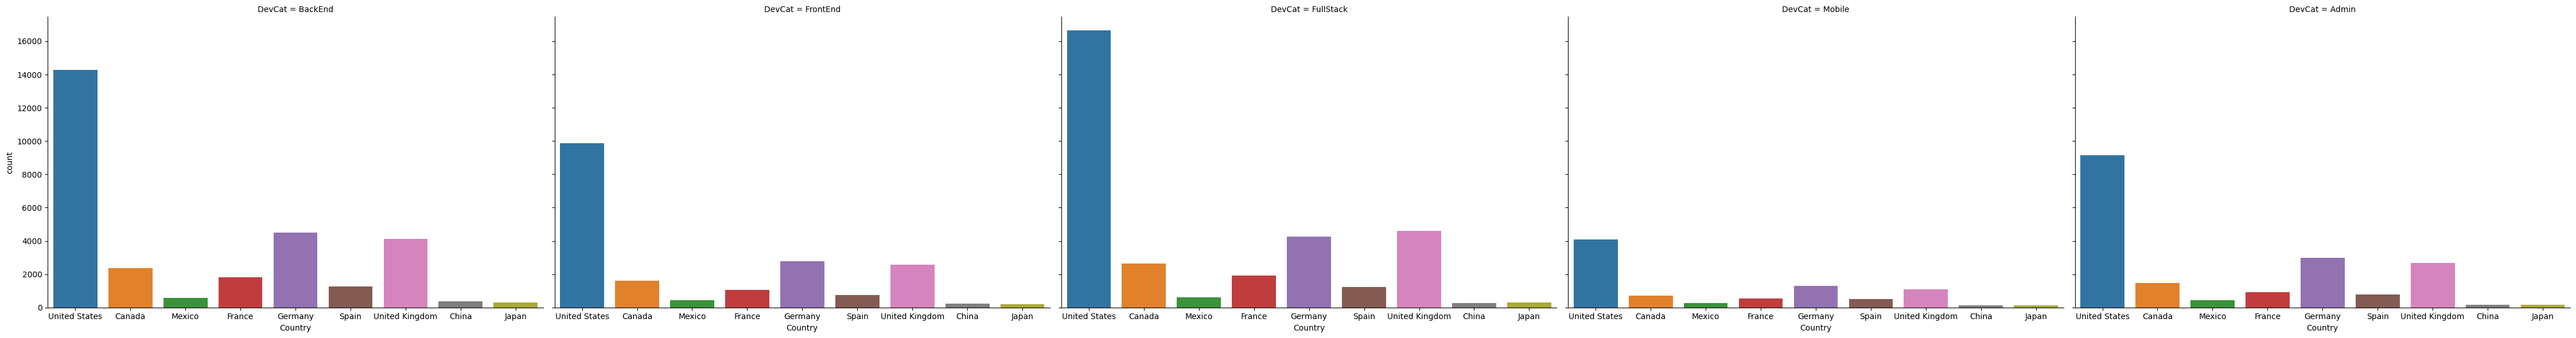

In [31]:
#plots employment type distribution by country
empfig = sns.catplot(x="Country", col="Employment",
                data=df, kind="count",
                height=6, aspect=1.5);
 
#focuses on a few of the key developer types from the survey data
devdf = df[['Country','DevType']]
devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
devdf.loc[devdf['DevType'].str.contains('full-stack'), 'FullStack'] = True
devdf.loc[devdf['DevType'].str.contains('mobile'), 'Mobile'] = True
devdf.loc[devdf['DevType'].str.contains('administrator'), 'Admin'] = True
 
devdf = devdf.melt(id_vars=['Country'], 
    value_vars=['BackEnd','FrontEnd','FullStack','Mobile','Admin'], 
    var_name='DevCat',
    value_name='DevFlag')
 
#drop rows with null values
devdf.dropna(how='any', inplace=True)
 
#plots the developer type distribution by country for the dev types we selected
devFig = sns.catplot(x="Country", col="DevCat",
                data=devdf, kind="count",
                height=6, aspect=1.5);

We can see that the majority of the data is from developers who are employed full time. The majority of developers are front-end, back-end, or full-stack.

Next, I want to see trends in educational background per developer type over time. 11% of data was missing from the undergradmajor column. I want to investigate which years had missing data points for this variable. The code below plots missingness in this variable by year.

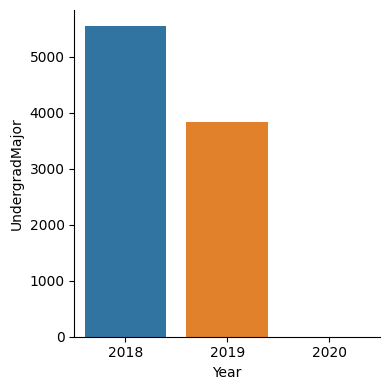

In [32]:
missingUndergrad = df['UndergradMajor'].isnull().groupby(df['Year']).sum().reset_index()
 
sns.catplot(x="Year", y="UndergradMajor",
                data=missingUndergrad, kind="bar",
                height=4, aspect=1);

2020 does not have missing data. Looking at the data file, we can see that each respondant has data entered in 2018, 2019, and 2020 - since there is not missing entry in 2020, every respondant has entered a response for the undergrad major variable. With that in mind, for the missing data for this variable, I am going to use the Next Observation Carried Backwards (NOCB) method of single imputation to fill the missing values.

In [34]:
# Sort by ID and Year so that each person's data is carried backwards correctly
df = df.sort_values(['RespondentID','Year'])
 
#then backfill 
df['UndergradMajor'].bfill(axis=0, inplace=True)

Visualize major distribution for each year using a bar chart

/var/folders/nq/d5k2n21s4yxgqbs_k02b1p2h0000gp/T/ipykernel_44791/2318743366.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf.dropna(how='any', inplace=True)
/var/folders/nq/d5k2n21s4yxgqbs_k02b1p2h0000gp/T/ipykernel_44791/2318743366.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
/var/folders/nq/d5k2n21s4yxgqbs_k02b1p2h0000gp/T/ipykernel_44791/2318743366.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

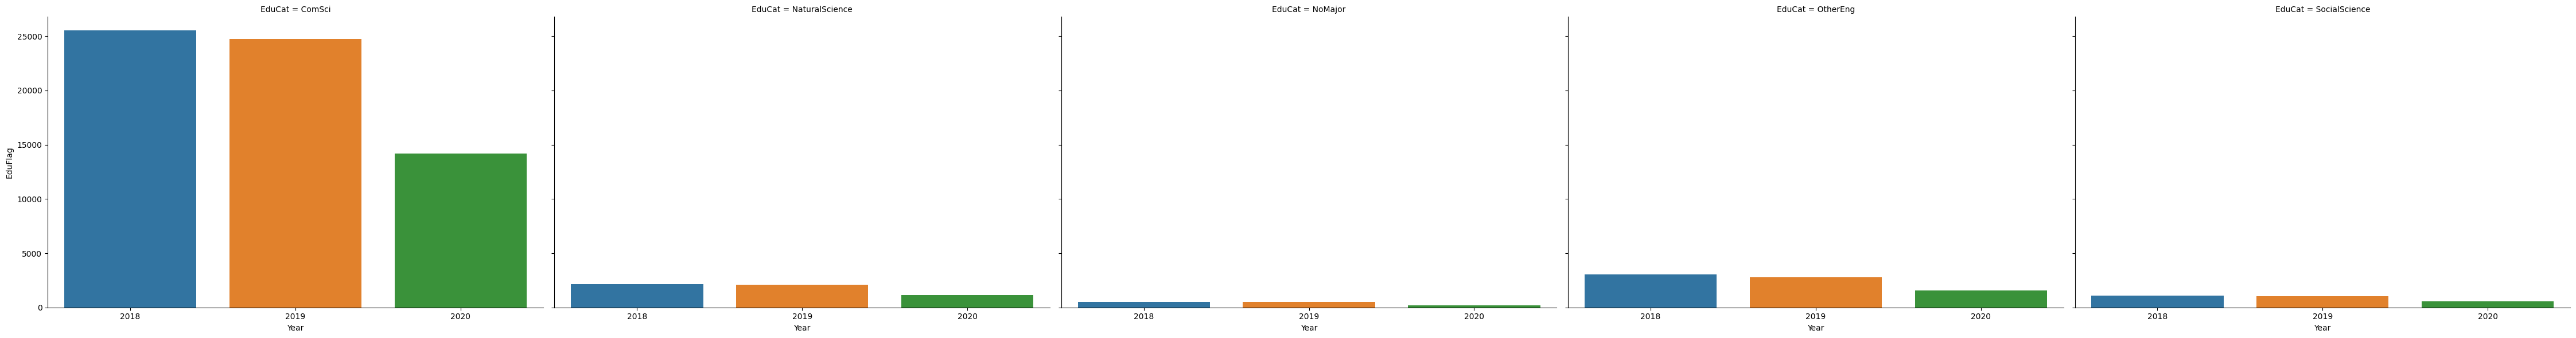

In [35]:
# Key major groups outlined in the Stack Overflow survey
majors = ['social science','natural science','computer science','development','another engineering','never declared']
 
edudf = df[['Year','UndergradMajor']]
edudf.dropna(how='any', inplace=True)
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)natural science'), 'NaturalScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)computer science'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)development'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)another engineering'), 'OtherEng'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)never declared'), 'NoMajor'] = True
 
edudf = edudf.melt(id_vars=['Year'], 
    value_vars=['SocialScience','NaturalScience','ComSci','OtherEng','NoMajor'], 
    var_name='EduCat',
    value_name='EduFlag')
 
edudf.dropna(how='any', inplace=True)
edudf = edudf.groupby(['Year','EduCat']).count().reset_index()
 
eduFig = sns.catplot(x="Year", y='EduFlag', col="EduCat",
                data=edudf, kind="bar",
                height=6, aspect=1.5);

The vast majority had a compsci degree, but compsci degrees among respondants declined significantly in 2020.

I want to investigate the relationship between years of experience and compensation. I assume that there will be a strong, positive correlation, but I will investigate that. First, the code below performs some more exploratory analysis.

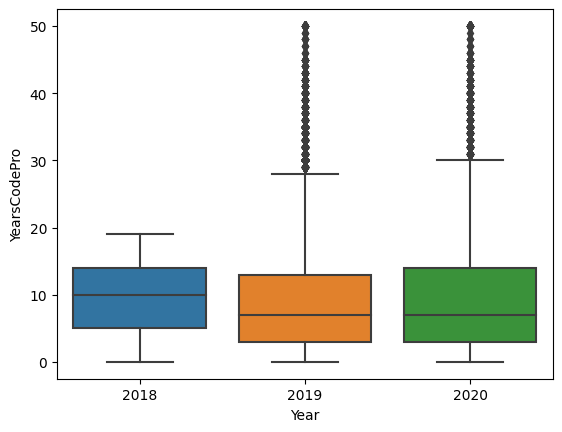

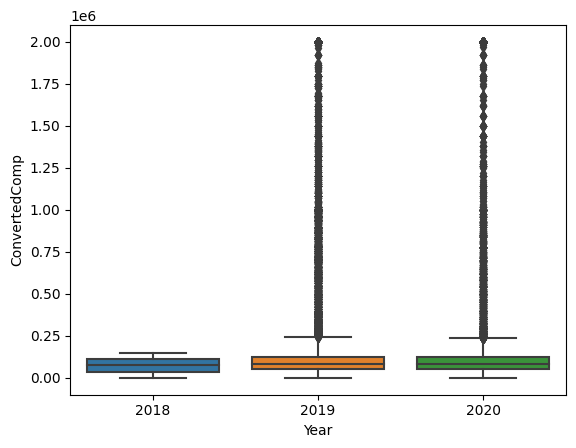

In [39]:
compFields = df[['Year','YearsCodePro','ConvertedComp']]

D = sns.boxplot(x="Year", y="YearsCodePro",
            data=compFields)
plt.show()

E = sns.boxplot(x="Year", y="ConvertedComp",
            data=compFields)

The data in the box plots is pretty consistent - this indicates there is likely a strong correlation between the variables. There is missing data in these columns, though. Since there is a clear trend in the data, it will be best ot use Multiple Imputation to fill in the missing values. Already imported the necessary modules from scikit-learn at the top^

In [43]:
imputedf = df[['YearsCodePro','ConvertedComp']]

traindf, testdf = train_test_split(imputedf, train_size=0.1)

# Create the IterativeImputer model to predict missing values
imp = IterativeImputer(max_iter=20, random_state=0)

# Fit the model to the test dataset
imp.fit(imputedf)

# Transform the model on the entire dataset
compdf = pd.DataFrame(np.round(imp.transform(imputedf),0), columns=['YearsCodePro','ConvertedComp'])

The multiple imutation code has filled in missing data using the context of the surrounding data in other columns. Now I can analyze the YearsCodePro and Comp variables.

/var/folders/nq/d5k2n21s4yxgqbs_k02b1p2h0000gp/T/ipykernel_44791/162640794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)


<AxesSubplot: xlabel='CodeYearBins', ylabel='ConvertedComp'>

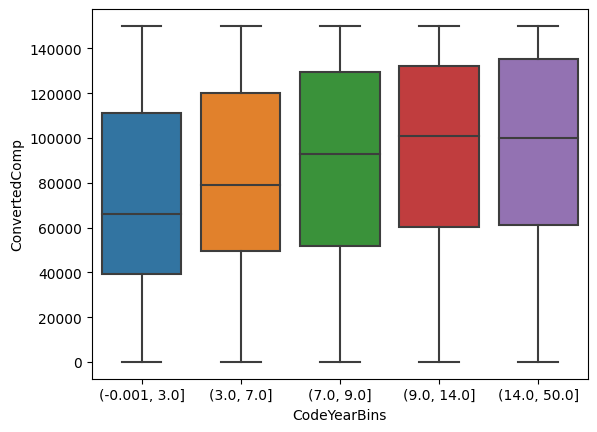

In [44]:
compPlotdf = compdf.loc[compdf['ConvertedComp'] <= 150000]
compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)

sns.boxplot(x="CodeYearBins", y="ConvertedComp",
            data=compPlotdf)

Experience seems to be correlated with compensation. The more years of professional coding, the higher the comp on average.